# Homework
Soren Rajani \
Nov 20th

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## 1.a

We can represent the Markov process as the following matrix $P$

In [2]:
P = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0.2,0.4,0.4]])
print(P)

[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.2 0.4 0.4]]


## 1.b

The state $x_0 = 1$ can be represented as the vector (1,0,0), then to get the next state's probabilities we multiply it by the probability matrix $P$

In [3]:
x_0 = np.array([[1,0,0]])
x_1 = x_0 @ P
print(x_1)

[[0.2 0.7 0.1]]


# Question 2

## 2.a

To find the solution we can use Numpy to get the eigenvalues of $P.T$

In [4]:
eig = np.linalg.eig(P.T)
print(eig)

EigResult(eigenvalues=array([ 1.00000000e+00, -1.26987179e-16,  1.00000000e-01]), eigenvectors=array([[ 3.22458464e-01,  2.67261242e-01, -5.72433999e-16],
       [ 8.24060518e-01, -8.01783726e-01, -7.07106781e-01],
       [ 4.65773337e-01,  5.34522484e-01,  7.07106781e-01]]))


Above we can see that the eignevalue we are interested in, 1, corresponds to the 3rd vector. To get the stationary distribution we take the 3rd column vector and take then normalize it. \
The output I show is the vector, then the vector multiplied the transitiona matrix.

In [5]:
x_stationary = eig[1][:,0]/np.sum(eig[1][:,0])
print(x_stationary)
print(x_stationary @ P)

[0.2        0.51111111 0.28888889]
[0.2        0.51111111 0.28888889]


## 2.b

To get the plot desired, I iterate over applications of the transition matrix $P$ from 1 to 5 (which is enough time for both to converge).

In [6]:
m = 5

results1 = np.zeros(m)
results2 = np.zeros(m)


vector1 = np.array([.4,.4,.2])
vector2 = np.array([.1,.1,.8])


for j in range(0,m):
    vector1 = vector1 @ P
    vector2 = vector2 @ P
    results1[j] = (np.linalg.norm(vector1-x_stationary)) 
    results2[j] = (np.linalg.norm(vector2-x_stationary)) 

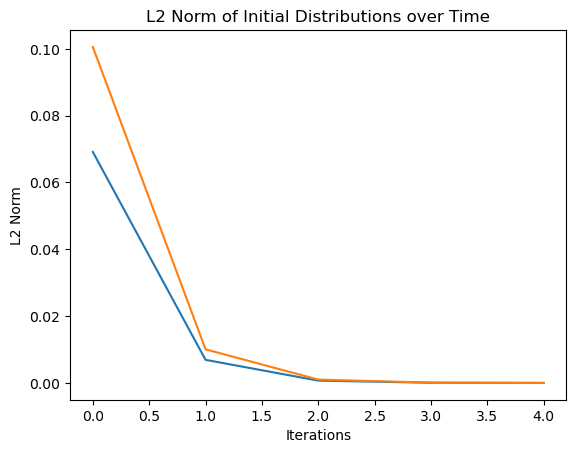

In [7]:
plt.plot(results1)
plt.plot(results2)
plt.title('L2 Norm of Initial Distributions over Time')
plt.ylabel('L2 Norm')
plt.xlabel('Iterations')
plt.show()

# Question 3

## 3.a

To make 3 an absorbing state, we change its probability to be 1 on the diagonal so it always transitions to itself.

In [8]:
P = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0,0,1]])
print(P)

[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.  0.  1. ]]


In [9]:
class MarkovProcess:
    def __init__(self, transition_matrix):
        self.transition_matrix = transition_matrix
        self.num_states = self.transition_matrix.shape[0]
        self.current_state = 0
    
    def set_state(self, state):
        self.current_state = state
    
    def simulate(self, num_steps):
        states = [self.current_state]
        for _ in range(num_steps):
            self.current_state = np.random.choice(
                self.num_states, p=self.transition_matrix[self.current_state]
            )
            states.append(self.current_state)
        return states
    
    def steps_to_reach_state(self, target_state):
        steps = 0
        while self.current_state != target_state:
            self.current_state = np.random.choice(
                self.num_states, p=self.transition_matrix[self.current_state]
            )
            steps += 1
        return steps


In [10]:
myProcess = MarkovProcess(P)

results0 = np.zeros(500)
results1 = np.zeros(500)

for i in range(0,500):
    myProcess.set_state(0)
    results0[i] = myProcess.steps_to_reach_state(2)

for i in range(0,500):
    myProcess.set_state(1)
    results1[i] = myProcess.steps_to_reach_state(2)

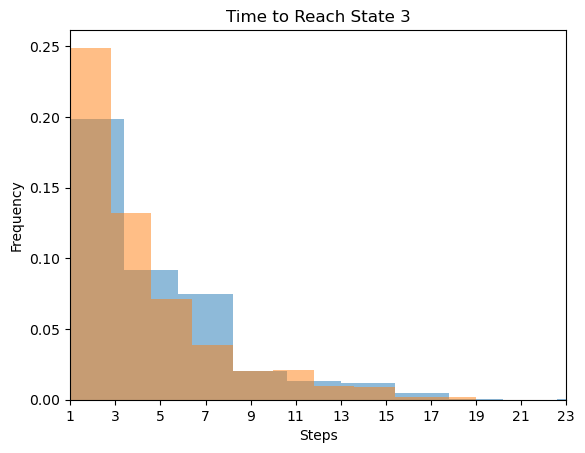

In [11]:
plt.hist(results0,density = True, alpha = 0.5)
plt.hist(results1,density = True, alpha = 0.5)
plt.xlim(1,23)
plt.xticks(np.arange(1,24,2))

plt.title('Time to Reach State 3')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

The mean time to converge is 

In [15]:
print(f' The mean time starting at 1 is: {np.mean(results0)}')
print(f' The mean time starting at 2 is: {np.mean(results1)}')

 The mean time starting at 1 is: 4.662
 The mean time starting at 2 is: 3.974


## 3.b

To get the time by theoretical methods, we can solve the equation:
$$ \mu_i = 1 + \sum_{j=1}^3p_{ij}\mu_j$$

where $\mu_3 = 0$ since it is an absorbing state.

This can be expanded to the system of equations:
$$ \mu_1 = 1 + 0.2\mu_1+0.7\mu_2$$
$$ \mu_2 = 1 + 0.2\mu_1+0.5\mu_2$$

subtracting equation 1 from 2 gives us:
$$ \mu_2 - \mu_1 = -0.2\mu_2$$
$$ 1.2\mu_2 = \mu1$$


substituting that back into equation 1 gives us:
$$ 1.2 \mu_2 = 1 + 0.2(1.2\mu_2) + 0.7\mu_2$$
$$ \mu_2 = 1 / 0.26 = 3.846$$

using the initial formula:
$$1.2\mu_2=\mu_1$$
$$\mu_1 = 4.615 $$

This is rouhgly consistent with the simulated results.